<a href="https://colab.research.google.com/github/joymuli10/Predicting-Peoples-Movement-into-Nairobi/blob/main/Team_Data_Tuners_Predicting_People's_Movement_into_Nairobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mobiticket number-of-tickets Prediction**

# Defining the question 

## a). Specifying the question



> Build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.



## b). Defining the Metric for Success



> Mean Absolute Error












## c). Understanding the Context

Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours and cultural events.Mobiticket is a service to enables you book, pay and get bus tickets using your phone. Ticket reservations and payments can be done using MPESA checkout or using your mobile wallet for our partner public service bus operators.

This is a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset.



## d). Recording the Experimental Design



> Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:

1. Load data and preview data
2. Data Cleaning
3. Exploratory Analysis
4. Implementing the Solution
5. Challenging the Solution
6. Follow Up Question



## e). Appropriateness of the data



> The 2 datasets (train and test) to be used was provided by Zindi. 


> train_revised.csv (zipped) is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018 It has 51645 rows and 10 columns. This dataset includes the variables: - , seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.



> test_questions.csv is the dataset on which you will apply your model to estimate number of tickets sold by Mobiticket per unique ride. This dataset contains all of the rides offered on the same 14 routes during the two weeks following train.csv, i.e. 21 April 2018 to 9 May 2018. It has 1111 rows and 7 columns. The variables included in this dataset: - , travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.

Variables description:

- ride_id: unique ID of a vehicle on a specific route on a specific day and time.
- seat_number: seat assigned to ticket
- payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
- payment_receipt: unique id number for ticket purchased from Mobiticket
- travel_date: date of ride departure. (MM/DD/YYYY)
- travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
- travel_from: town from which ride originated
- travel_to: destination of ride. All rides are to Nairobi.
- car_type: vehicle type (shuttle or bus)
- max_capacity: number of seats on the vehicle







# Reading and Checking the Data

In [ ]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings  
warnings.filterwarnings('ignore')


In [ ]:
# Previewing the head of the train dataset

data_train = pd.read_csv('train_revised.csv')
data_train.head()


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
# Previewing the head of the test dataset

data_test = pd.read_csv('test_questions.csv')
data_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [ ]:
# Printing the data_train columns

print(data_train.columns.values)

['ride_id' 'seat_number' 'payment_method' 'payment_receipt' 'travel_date'
 'travel_time' 'travel_from' 'travel_to' 'car_type' 'max_capacity']


In [ ]:
# Printing the data_train columns

print(data_test.columns.values)

['ride_id' 'travel_date' 'travel_time' 'travel_from' 'travel_to'
 'car_type' 'max_capacity']


In [ ]:
# Checking the info of both datasets

print(data_train.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16453 entries, 0 to 16452
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          16453 non-null  int64 
 1   seat_number      16453 non-null  object
 2   payment_method   16453 non-null  object
 3   payment_receipt  16453 non-null  object
 4   travel_date      16453 non-null  object
 5   travel_time      16453 non-null  object
 6   travel_from      16453 non-null  object
 7   travel_to        16453 non-null  object
 8   car_type         16453 non-null  object
 9   max_capacity     16453 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 1.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ride_id       1111 non-null   int64 
 1   travel_date   1111 non-null   object
 2   travel_time   111

In [ ]:
# Checking the number of columns and rows

print('Train dataset shape: {} Rows, {} Columns'.format(*data_train.shape))
print('Test dataset shape: {} Rows, {} Columns'.format(*data_test.shape))

Train dataset shape: 16453 Rows, 10 Columns
Test dataset shape: 1111 Rows, 7 Columns


# Data Cleaning

In [ ]:
# Creating a new dataset Variable that groups the seat_number by ride_id to obtain the number of tickets 
Var=data_train.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()

# Dropping duplicates
train=data_train.drop_duplicates("ride_id")

# Dropping unnecessary columns
train=train.drop(['payment_method', 'payment_receipt', 'seat_number'],axis=1)

# Merging the train and Var datasets
train=train.merge(Var,how="left",on="ride_id")
train.shape

(2175, 8)

In [ ]:
 train.head(5)

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [ ]:
data_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [ ]:
# Checking for the unique values in each variable

train.nunique()

ride_id             2175
travel_date          130
travel_time           76
travel_from           12
travel_to              1
car_type               2
max_capacity           2
number_of_ticket      50
dtype: int64

In [ ]:
# fixing the date format of the test and train sets
def add_20(x):
    date=x.split("-")
    date[-1]="20"+date[-1]
    return "-".join(date)
train["date"]=(train["travel_date"].apply(add_20)+" "+train["travel_time"]).astype(str)
data_test["date"]=(data_test["travel_date"]+" "+data_test["travel_time"]).astype(str)

In [ ]:
# adding time to the train set
def  time_features(x): 
    x["date"]=pd.to_datetime(x["date"],format='%d-%m-%Y %H:%M')
    x["dayofweek"]=x["date"].dt.dayofweek
    x["dayofyear"]=x["date"].dt.dayofyear
    x["dayofmonth"]=x["date"].dt.day
    x["year_woy"]=x["date"].dt.year.astype(str)+x["date"].dt.weekofyear.astype(str)
    x["hour"]=x["date"].dt.hour
    x["minute"]=x["date"].dt.minute
    x["is_weekend"]=x["dayofweek"].apply( lambda x : 1 if x  in [5,6] else 0 )
    x["year"]=x["date"].dt.year
    x["quarter"]=x["date"].dt.quarter
    x["month"]=x["date"].dt.month
    

    return x 
train=time_features(train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
# adding time features to the test dataset
def  time_features(x): 
    x["date"]=pd.to_datetime(x["date"],format='%Y-%m-%d %H:%M')
    x["dayofweek"]=x["date"].dt.dayofweek
    x["hour"]=x["date"].dt.hour
    x["minute"]=x["date"].dt.minute
    x["dayofyear"]=x["date"].dt.dayofyear
    x["dayofmonth"]=x["date"].dt.day
    x["is_weekend"]=x["dayofweek"].apply( lambda x : 1 if x  in [5,6] else 0 )
    x["year_woy"]=x["date"].dt.year.astype(str)+x["date"].dt.weekofyear.astype(str)
    x["year"]=x["date"].dt.year
    x["quarter"]=x["date"].dt.quarter
    x["month"]=x["date"].dt.month
    return x 
data_test=time_features(data_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [ ]:
data_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,date,dayofweek,hour,minute,dayofyear,dayofmonth,is_weekend,year_woy,year,quarter,month
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,2018-05-07 07:06:00,0,7,6,127,7,0,201819,2018,2,5
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,2018-05-06 11:08:00,6,11,8,126,6,1,201818,2018,2,5
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,2018-05-04 05:00:00,4,5,0,124,4,0,201818,2018,2,5
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,2018-05-04 09:10:00,4,9,10,124,4,0,201818,2018,2,5
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,2018-05-04 09:20:00,4,9,20,124,4,0,201818,2018,2,5


In [ ]:
# Checking the shape
print(train.shape)
print(data_test.shape)

(2175, 19)
(1111, 18)


In [ ]:
# Checking for missing values per column in data_train

train.isnull().sum()


ride_id             0
travel_date         0
travel_time         0
travel_from         0
travel_to           0
car_type            0
max_capacity        0
number_of_ticket    0
date                0
dayofweek           0
dayofyear           0
dayofmonth          0
year_woy            0
hour                0
minute              0
is_weekend          0
year                0
quarter             0
month               0
dtype: int64

No missing values in the train set

In [ ]:
# Checking for missing values per column in data_train

data_test.isnull().sum()

ride_id         0
travel_date     0
travel_time     0
travel_from     0
travel_to       0
car_type        0
max_capacity    0
date            0
dayofweek       0
hour            0
minute          0
dayofyear       0
dayofmonth      0
is_weekend      0
year_woy        0
year            0
quarter         0
month           0
dtype: int64

No missing values in the test set

In [ ]:
# Checking for duplicated entries

data_train.duplicated().sum()

0

No duplicates in the train set

In [ ]:
# Checking for duplicated entries

data_test.duplicated().sum()

# Absence of duplicates

0

No duplicates in the test set

In [ ]:
# checking where the number of tickets sold per ride are greator than the max_capacity of the car_type
check = train['number_of_ticket'] > train['max_capacity']
check.value_counts()

False    2170
True        5
dtype: int64

In [ ]:
# dropping the rows where number_of_tickets is > than max_capacity
train = train[train['number_of_ticket'] <= train['max_capacity']] 
train

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,date,dayofweek,dayofyear,dayofmonth,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,8777,04-02-18,10:30,Kisii,Nairobi,shuttle,11,11,2018-02-04 10:30:00,6,35,4,20185,10,30,1,2018,1,2
2171,8778,04-02-18,10:20,Kisii,Nairobi,shuttle,11,10,2018-02-04 10:20:00,6,35,4,20185,10,20,1,2018,1,2
2172,8779,04-02-18,10:10,Kisii,Nairobi,shuttle,11,4,2018-02-04 10:10:00,6,35,4,20185,10,10,1,2018,1,2
2173,8780,04-02-18,10:00,Kisii,Nairobi,shuttle,11,1,2018-02-04 10:00:00,6,35,4,20185,10,0,1,2018,1,2


# Exploratory Data Analysis



> Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.



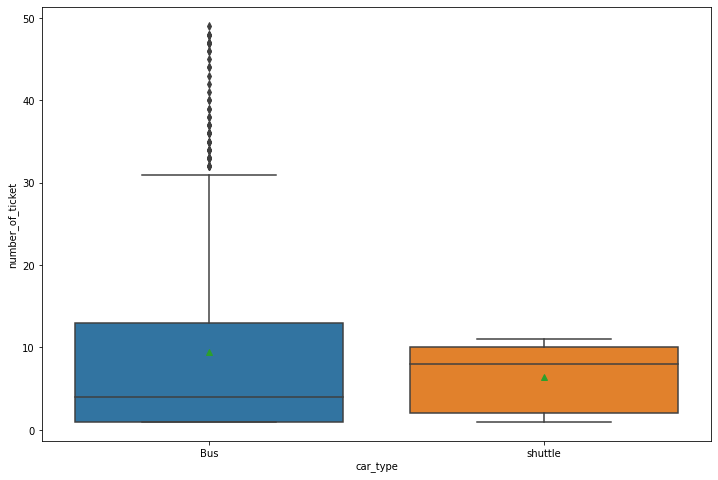

In [ ]:
# Checking for outliers using boxplots

plt.figure(figsize=(12,8))
sns.boxplot(x = 'car_type', y = 'number_of_ticket', data=train,showmeans=True)

Text(0.5, 1.0, 'Car_type catplot')

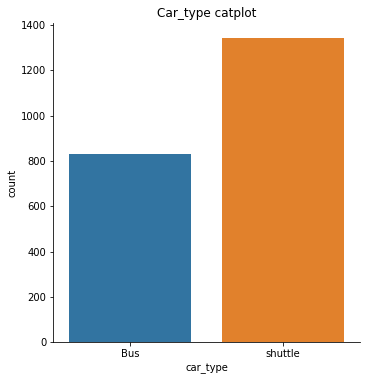

In [ ]:
# exploring the car type variable
sns.catplot(x="car_type", kind="count", data= train)
plt.title('Car_type catplot')


Most trips used shuttle car_types

Text(0.5, 1.0, 'Day of week')

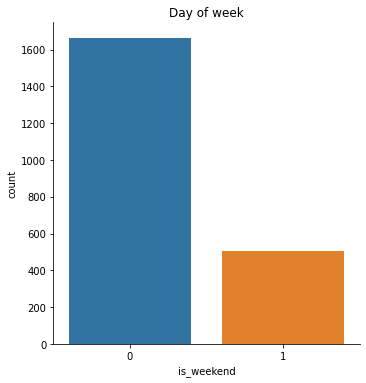

In [ ]:
# exploring the car type variable
sns.catplot(x="is_weekend", kind="count", data= train)
plt.title('Day of week')

Weekdays have more rides than weekends

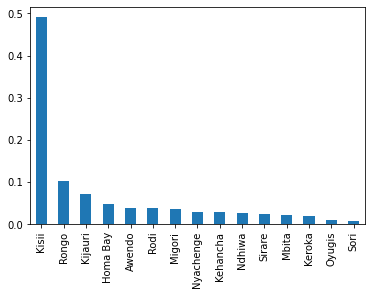

In [ ]:
# Plottin the bar graphs
data_test.travel_from.value_counts(normalize=True).plot(kind = 'bar')

Most travellers come from Kisii followed by Rongo and Kijauri

Text(0.5, 1.0, 'number of tickets')

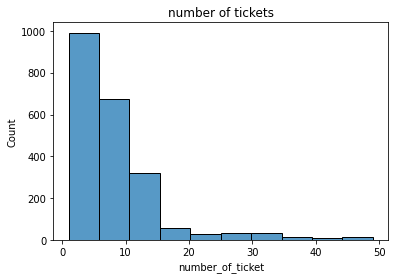

In [ ]:
#Plot number of ticket distribution 
sns.histplot(train['number_of_ticket'], bins=10)
plt.title('number of tickets')

The number of tickets sold do not follow a normal distribution. Skewed to the left

In [ ]:
# checking for skewness in the target variable
train['number_of_ticket'].skew()

2.3657659847206856

In [ ]:
# kurtosis
train['number_of_ticket'].kurt()

7.476411013173974

In [ ]:
# Grouping the categorical features
categorical_features=["travel_from","car_type","dayofweek","dayofmonth","hour","minute","year"]

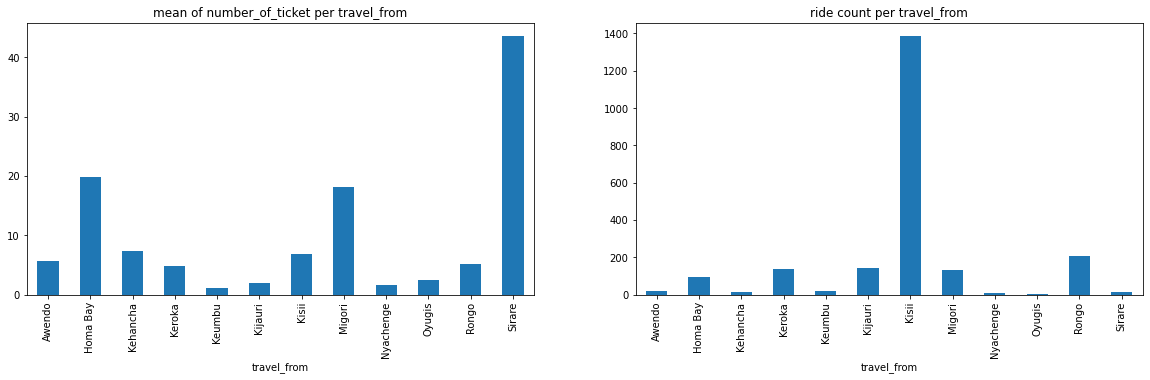

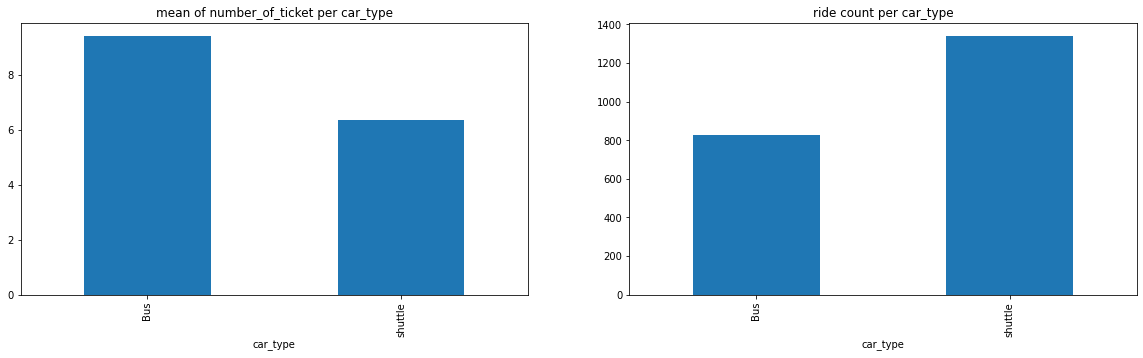

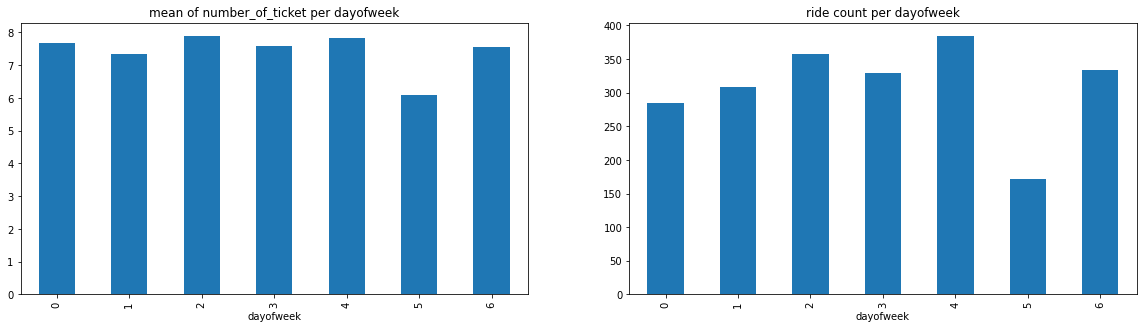

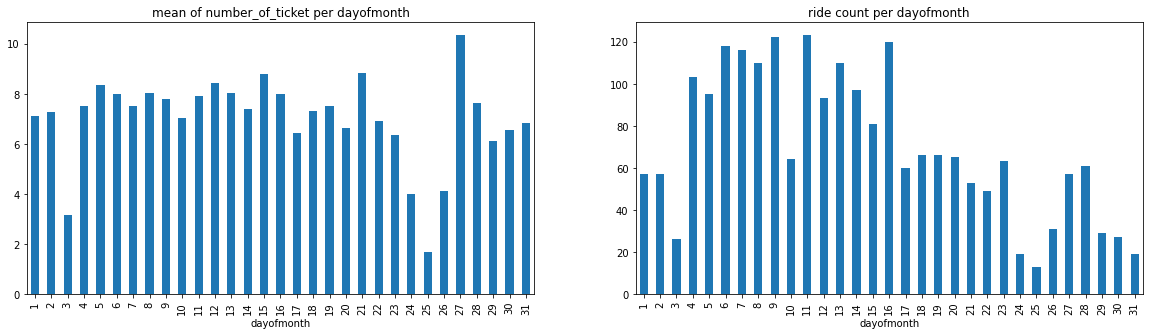

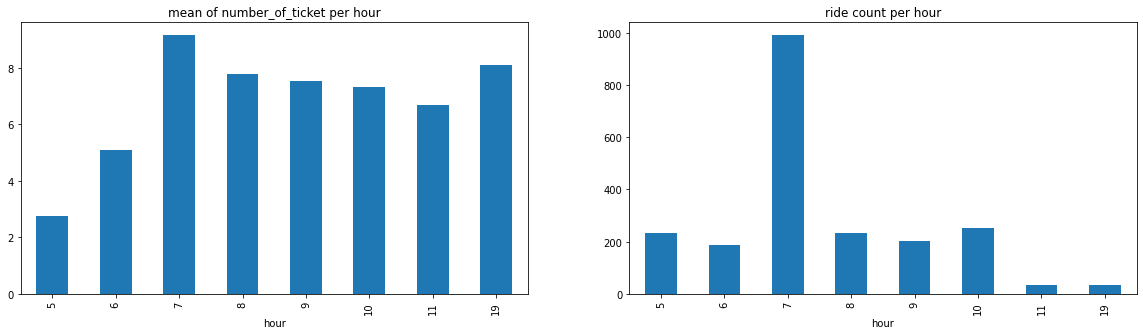

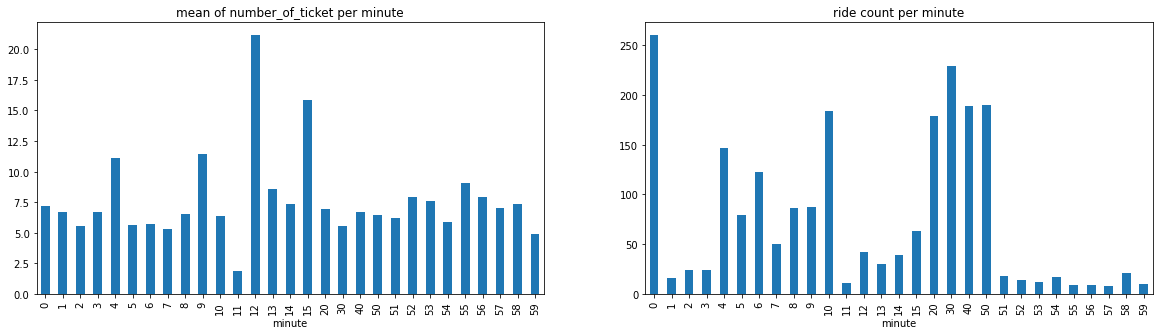

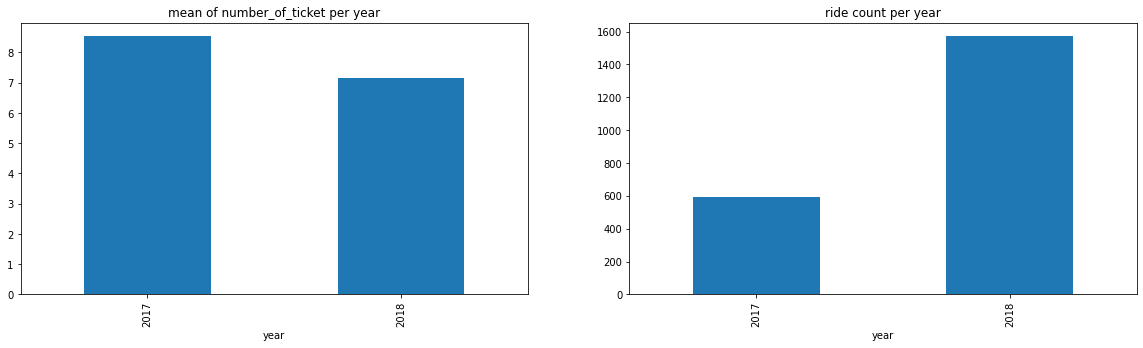

In [ ]:
# plotting count plots of the categorical variables
def plot_categorical_feature(feature):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    train.groupby(feature).number_of_ticket.mean().plot(kind="bar",ax=axes[0],figsize=(20,5),title="mean of number_of_ticket per {}".format(feature))
    train.groupby(feature).number_of_ticket.count().plot(kind="bar",ax=axes[1],figsize=(20,5),title="ride count per {}".format(feature))    
    plt.show()
for feature in categorical_features : 
    plot_categorical_feature(feature)

Text(0.5, 1.0, 'Day of the week vs number of tickets')

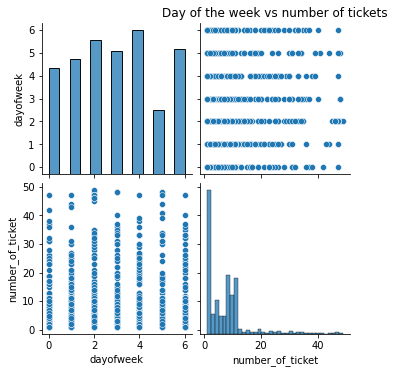

In [ ]:
# Determine correlation between numeric features
sns.pairplot(train[['dayofweek','number_of_ticket']])
plt.title('Day of the week vs number of tickets')

Text(0.5, 1.0, 'hour vs number of tickets')

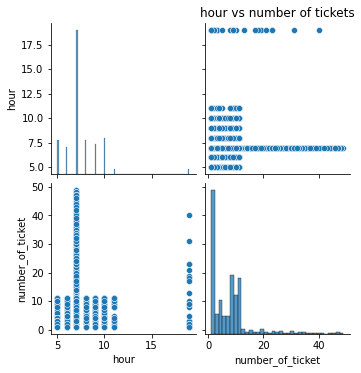

In [ ]:
# Determine correlation between numeric features
sns.pairplot(train[['hour','number_of_ticket']])
plt.title('hour vs number of tickets')

In [ ]:
# label encoding categorical variables
from sklearn.preprocessing import LabelEncoder
train['travel_from'] = LabelEncoder().fit_transform(train['travel_from'])
train['car_type'] = LabelEncoder().fit_transform(train['car_type'])

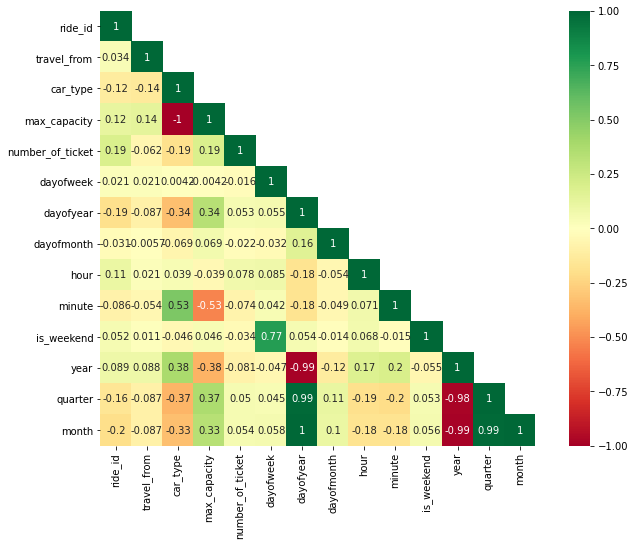

In [ ]:
# plotting a heatmap to identify correlated features
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(train.corr(), k=1))
plt.show()

We are going to ignore the correlated features as we aren't going to be using all of them.

## **Baseline Model**

In [ ]:
test = data_test

In [ ]:
train.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'travel_to',
       'car_type', 'max_capacity', 'number_of_ticket', 'date', 'dayofweek',
       'dayofyear', 'dayofmonth', 'year_woy', 'hour', 'minute', 'is_weekend',
       'year', 'quarter', 'month'],
      dtype='object')

In [ ]:
train_new = train[['ride_id','travel_from','car_type','max_capacity','dayofweek','hour','month','number_of_ticket']]
train_new.head()

,ride_id,travel_from,car_type,max_capacity,dayofweek,hour,month,number_of_ticket
0,1442,7,0,49,1,7,10,1
1,5437,7,0,49,6,7,11,1
2,5710,3,0,49,6,7,11,1
3,5777,1,0,49,0,7,11,5
4,5778,7,0,49,0,7,11,31


In [ ]:
x1 = train_new[['travel_from','car_type','max_capacity','dayofweek','hour','month']]
y1 = train_new['number_of_ticket']

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predicting using the linear regression model
y1_pred = regressor.predict(x1_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('MSE: ', metrics.mean_squared_error(y1_test, y1_pred))
print('r2 score: ', r2_score(y1_test, y1_pred))
#RMSE     :  7.831117900689911
#MSE      :  61.32640757450596
#r2 score :  0.08340605251648314

RMSE:  7.716190142795252
MSE:  59.53959031977062
r2 score:  0.02546049457531918


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y1_pred, y1_test))

5.330063943848385


The mean absolute error for the base model is 5.330063943848385


# **Exploration of other models.**

### **XGBoost**

In [ ]:
x3 = train_new[['travel_from','car_type','max_capacity','dayofweek','hour','month']]
y3 = train_new['number_of_ticket']

import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=x3,label=y3)

from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=0)

In [ ]:
xg_reg = xgb.XGBRegressor()

xg_reg.fit(x3_train,y3_train)

y3_pred = xg_reg.predict(x3_test)

[05:52:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(mean_absolute_error(y3_pred, y3_test))

3.478394367727816


The mean absolute error for xgboost regressor is 3.478

### **Random Forest Regressor**

In [ ]:
x2 = train_new[['travel_from','car_type','max_capacity','dayofweek','hour','month']]
y2 = train_new['number_of_ticket']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor() 
forest.fit(x2_train, y2_train)

y2_pred = forest.predict(x2_test)

In [ ]:
print(mean_absolute_error(y2_pred, y2_test))

3.445505339210502


The mean absolute error for the random forest regressor is 3.445


### **Feature Selection**

In [ ]:
x4 = train_new[['travel_from','car_type','max_capacity','dayofweek','hour','month']]
y4 = train_new['number_of_ticket']

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor() 
forest.fit(x4_train, y4_train)

importances = forest.feature_importances_

In [ ]:
test_features = ['travel_from','car_type','max_capacity','dayofweek','hour','month']
features_imp = pd.DataFrame(test_features, importances).reset_index()
features_imp.rename(columns={'index':'Importance',0:'Feature'},inplace=True)
features_imp = features_imp.sort_values("Importance",ascending=False)
features_imp

,Importance,Feature
0,0.585729,travel_from
5,0.155702,month
3,0.155560,dayofweek
4,0.093880,hour
1,0.005020,car_type
2,0.004110,max_capacity


Text(0.5, 1.0, 'Feature Importances')

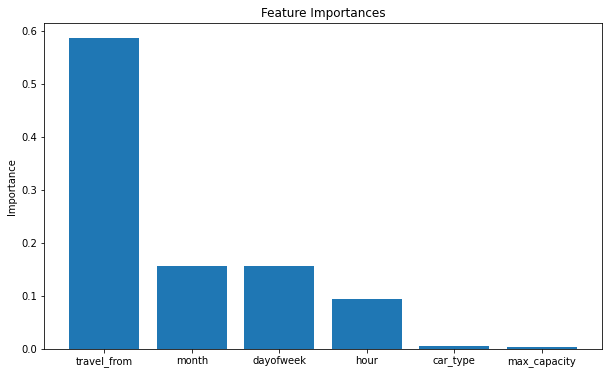

In [ ]:
plt.figure(figsize=(10,6))
# bar plot with matplotlib
plt.bar('Feature', 'Importance',data=features_imp)
plt.ylabel("Importance")
plt.title("Feature Importances")

We can see that the top features for use are:
* travel_from
* hour
* month
* dayofweek

In [ ]:
x5 = train_new[['travel_from','dayofweek','hour','month']]
y5 = train_new['number_of_ticket']

x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor() 
forest.fit(x5_train, y5_train)

y5_pred = forest.predict(x5_test)

In [ ]:
print(mean_absolute_error(y5_pred, y5_test))

3.438244541242945


## **Hyper-Parameter Tuning**

### XGBOOST

In [ ]:
import xgboost as xgb
#Now you will convert the dataset into an optimized data structure called Dmatrix that
# XGBoost supports and gives it acclaimed performance and efficiency gains.
data_dmatrix = xgb.DMatrix(data=x3,label=y3)

from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=0)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(x3_train,y3_train)

y_preds = xg_reg.predict(x3_test)

[05:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y3_test, y_preds))
print("RMSE: %f" % (rmse))

#mse = 2.76992684

RMSE: 7.372549


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_preds, y3_test))

4.952581238270539


In [ ]:
x3

,travel_from,car_type,max_capacity,dayofweek,hour,month
0,7,0,49,1,7,10
1,7,0,49,6,7,11
2,3,0,49,6,7,11
3,1,0,49,0,7,11
4,7,0,49,0,7,11
...,...,...,...,...,...,...
2170,6,1,11,6,10,2
2171,6,1,11,6,10,2
2172,6,1,11,6,10,2
2173,6,1,11,6,10,2


In [ ]:
xgb.DMatrix(x3, label=y3)

In [ ]:
dtrain = xgb.DMatrix(x3_train, label=y3_train)
dtest = xgb.DMatrix(x3_test, label=y3_test)

In [ ]:
# "Learn" the mean from the training data
mean_train = np.mean(y4_train)
# Get predictions on the test set
baseline_predictions = np.ones(y4_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y4_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 5.10


In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [ ]:
params['eval_metric'] = "mae"
num_boost_round = 999

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[05:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:5.44093
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:4.70139
[2]	Test-mae:4.29405
[3]	Test-mae:4.01649
[4]	Test-mae:3.84631
[5]	Test-mae:3.74008
[6]	Test-mae:3.7149
[7]	Test-mae:3.68011
[8]	Test-mae:3.65645
[9]	Test-mae:3.6481
[10]	Test-mae:3.61746
[11]	Test-mae:3.59678
[12]	Test-mae:3.59964
[13]	Test-mae:3.59465
[14]	Test-mae:3.58466
[15]	Test-mae:3.57386
[16]	Test-mae:3.57151
[17]	Test-mae:3.56937
[18]	Test-mae:3.56177
[19]	Test-mae:3.5619
[20]	Test-mae:3.55325
[21]	Test-mae:3.55501
[22]	Test-mae:3.55012
[23]	Test-mae:3.54823
[24]	Test-mae:3.54849
[25]	Test-mae:3.55035
[26]	Test-mae:3.54894
[27]	Test-mae:3.54769
[28]	Test-mae:3.55657
[29]	Test-mae:3.5557
[30]	Test-mae:3.55613
[31]	Test-mae:3.55729
[32]	Test-mae:3.55374
[33]	Test-mae:3.56222
[34]	Test-mae:3.56257
[35]	Test-mae:3.56795
[36]	Test-mae:3.57182
[37]	Test-mae:3.5

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[05:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,5.418603,0.037157,5.440267,0.245503
1,4.601529,0.037123,4.681557,0.256223
2,4.165971,0.031981,4.277998,0.278342
3,3.874515,0.045426,4.021853,0.263905
4,3.715960,0.043088,3.895441,0.240723
5,3.602784,0.045534,3.814824,0.230918
6,3.531680,0.046496,3.776711,0.232174
7,3.475658,0.049257,3.748400,0.244173
8,3.422679,0.043863,3.721732,0.252825
9,3.390334,0.046194,3.709823,0.249291


In [ ]:
cv_results['test-mae-mean'].min()

3.6869834

**max_depth and min_child_weight**

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[05:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 3.7439432000000004 for 9 rounds
CV with max_depth=9, min_child_weight=6
[05:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarede

In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 5

**subsample, colsample**

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[05:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 3.7518520000000004 for 9 rounds
CV with subsample=1.0, colsample=0.9
[05:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.0

**eta**

In [ ]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs
CV with eta=0.3
[05:53:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 3.7518520000000004 for 9 rounds

CV with eta=0.2
[05:53:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

In [ ]:
params['eta'] = .2

In [ ]:
params
{'colsample_bytree': 1.0,
 'eta': 0.2,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 5,
 'objective': 'reg:linear',
 'subsample': 1.0}

{'colsample_bytree': 1.0,
 'eta': 0.1,
 'eval_metric': 'mae',
 'max_depth': 10,
 'min_child_weight': 5,
 'objective': 'reg:linear',
 'subsample': 1.0}

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[05:53:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:6.42045
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:5.94714
[2]	Test-mae:5.54793
[3]	Test-mae:5.20838
[4]	Test-mae:4.94956
[5]	Test-mae:4.72055
[6]	Test-mae:4.53018
[7]	Test-mae:4.36821
[8]	Test-mae:4.2359
[9]	Test-mae:4.11733
[10]	Test-mae:4.01878
[11]	Test-mae:3.93223
[12]	Test-mae:3.85757
[13]	Test-mae:3.79281
[14]	Test-mae:3.73729
[15]	Test-mae:3.70004
[16]	Test-mae:3.66566
[17]	Test-mae:3.63755
[18]	Test-mae:3.611
[19]	Test-mae:3.58943
[20]	Test-mae:3.57449
[21]	Test-mae:3.56018
[22]	Test-mae:3.5492
[23]	Test-mae:3.53695
[24]	Test-mae:3.52615
[25]	Test-mae:3.51987
[26]	Test-mae:3.51284
[27]	Test-mae:3.50844
[28]	Test-mae:3.50471
[29]	Test-mae:3.50055
[30]	Test-mae:3.49803
[31]	Test-mae:3.49472
[32]	Test-mae:3.49323
[33]	Test-mae:3.49074
[34]	Test-mae:3.48921
[35]	Test-mae:3.49192
[36]	Test-mae:3.49191
[37]	Test-mae:3.4

In [ ]:
# Finding the best XGBoost model
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[05:53:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:6.42045
[1]	Test-mae:5.94714
[2]	Test-mae:5.54793
[3]	Test-mae:5.20838
[4]	Test-mae:4.94956
[5]	Test-mae:4.72055
[6]	Test-mae:4.53018
[7]	Test-mae:4.36821
[8]	Test-mae:4.2359
[9]	Test-mae:4.11733
[10]	Test-mae:4.01878
[11]	Test-mae:3.93223
[12]	Test-mae:3.85757
[13]	Test-mae:3.79281
[14]	Test-mae:3.73729
[15]	Test-mae:3.70004
[16]	Test-mae:3.66566
[17]	Test-mae:3.63755
[18]	Test-mae:3.611
[19]	Test-mae:3.58943
[20]	Test-mae:3.57449
[21]	Test-mae:3.56018
[22]	Test-mae:3.5492
[23]	Test-mae:3.53695
[24]	Test-mae:3.52615
[25]	Test-mae:3.51987
[26]	Test-mae:3.51284
[27]	Test-mae:3.50844
[28]	Test-mae:3.50471
[29]	Test-mae:3.50055
[30]	Test-mae:3.49803
[31]	Test-mae:3.49472
[32]	Test-mae:3.49323
[33]	Test-mae:3.49074
[34]	Test-mae:3.48921


### Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10,100,200], 'max_depth': [10, 200, 1500], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x5_train, y5_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [ ]:
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
grid_search_forest.best_estimator_.fit(x5_train,y5_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
forest1 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=200, max_features='auto', max_leaf_nodes=1500,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=19, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=-1, oob_score=False,
                      random_state=90, verbose=0, warm_start=False)
y7_pred = forest1.fit(x5_train,y5_train).predict(x5_test)
print(mean_absolute_error(y7_pred,y5_test))

3.192540322580645


# Conclusion

The baseline model used was Linear Regression which had a MAE of 5.33. We later used Random Forest to get the important features and it had an MAE of 3.51. XGBoost was also used and had an MAE of 4.95 and 3.489 after hyperparameter tuning. Grid search was used on Random Forest and after tweaking our parameters we had our best MAE at 3.19. This was close to the winning MAE which was at 3.00
